<a href="https://colab.research.google.com/github/pfelesova/dat.veda/blob/main/2021_10_14_Transfer_Learning_DogsAndCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

In [3]:
PATH = os.path.join('/content/drive/MyDrive/sweets') 

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validate')

BATCH_SIZE = 32
EPOCHS = 5
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)

In [5]:
train_dir

'/content/drive/MyDrive/sweets/train'

In [6]:
validation_dir

'/content/drive/MyDrive/sweets/validate'

## MobileNetV2

In [7]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
________________

## Transfer Learning

### Model

In [9]:
for layer in base_model.layers:
    layer.trainable = False
    
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(units=4, activation="softmax")(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Data Generators

In [10]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=32
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=32
)

Found 1800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


### Training

In [11]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
57/57 [==============================] - 479s 8s/step - loss: 1.4457 - accuracy: 0.4517 - val_loss: 0.8313 - val_accuracy: 0.6350
Epoch 2/10
57/57 [==============================] - 23s 398ms/step - loss: 0.8877 - accuracy: 0.6650 - val_loss: 0.6669 - val_accuracy: 0.7100
Epoch 3/10
57/57 [==============================] - 23s 401ms/step - loss: 0.7591 - accuracy: 0.7144 - val_loss: 0.6217 - val_accuracy: 0.7600
Epoch 4/10
57/57 [==============================] - 23s 399ms/step - loss: 0.6578 - accuracy: 0.7533 - val_loss: 0.6054 - val_accuracy: 0.7600
Epoch 5/10
57/57 [==============================] - 23s 399ms/step - loss: 0.6139 - accuracy: 0.7589 - val_loss: 0.5938 - val_accuracy: 0.7400
Epoch 6/10
57/57 [==============================] - 22s 391ms/step - loss: 0.6148 - accuracy: 0.7728 - val_loss: 0.6023 - val_accuracy: 0.7650
Epoch 7/10
57/57 [==============================] - 22s 390ms/step - loss: 0.5843 - accuracy: 0.7761 - val_loss: 0.5561 - val_accuracy: 0.8050
E

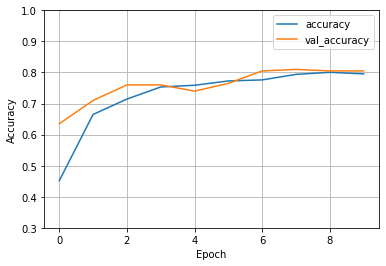

In [14]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.3, 1))

## Export to TFjs

In [15]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 2.1 MB/s 


In [16]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "./export_model") # convertuje do javascript

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [17]:
import shutil
shutil.make_archive("export_model", 'zip', "export_model/") # zazipuje

from google.colab import files
files.download('export_model.zip') # stiahne na pocitac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

And finally...

1.   Copy the downloaded file into `docs` folder of your GitHub repository and unzip it into `export_model` folder
2.   Add `index.html` and `index.js` from https://github.com/simecek/dspracticum2021/tree/main/docs
3.   Change the path in `index.js` from `https://raw.githubusercontent.com/simecek/dspracticum2021/master/docs/export_model/model.json` to the path in your repo
4. Change the setting of your repository to use GitHub pages (`main` branch, `docs` folder)

Do not forget to push from local to GitHub.


, 